In [165]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mplp
import numpy as np

#Meta-data
curr_path = os.getcwd()
#Get temporary folder for storing processing data
temp_data_folder = curr_path + '\\temp_store'
time_range = '2022-01'
meta_data_file = temp_data_folder+'\\'+time_range+'-'+'metadata_all.csv'
active_users_file = temp_data_folder+'\\'+time_range+'-'+'active_users.csv'
chunk_size = 100000

In [3]:
curr_path

'D:\\Programming_workspace\\Python\\Diplomska_Rabota'

In [4]:
with open(temp_data_folder+'\\'+time_range+'-hist-data.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

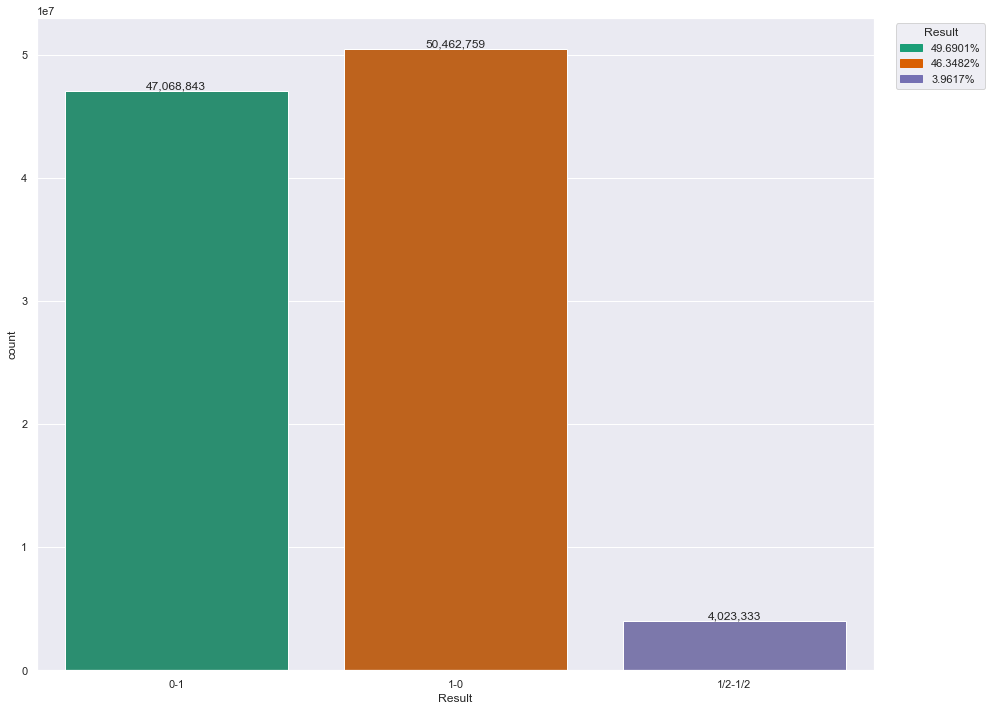

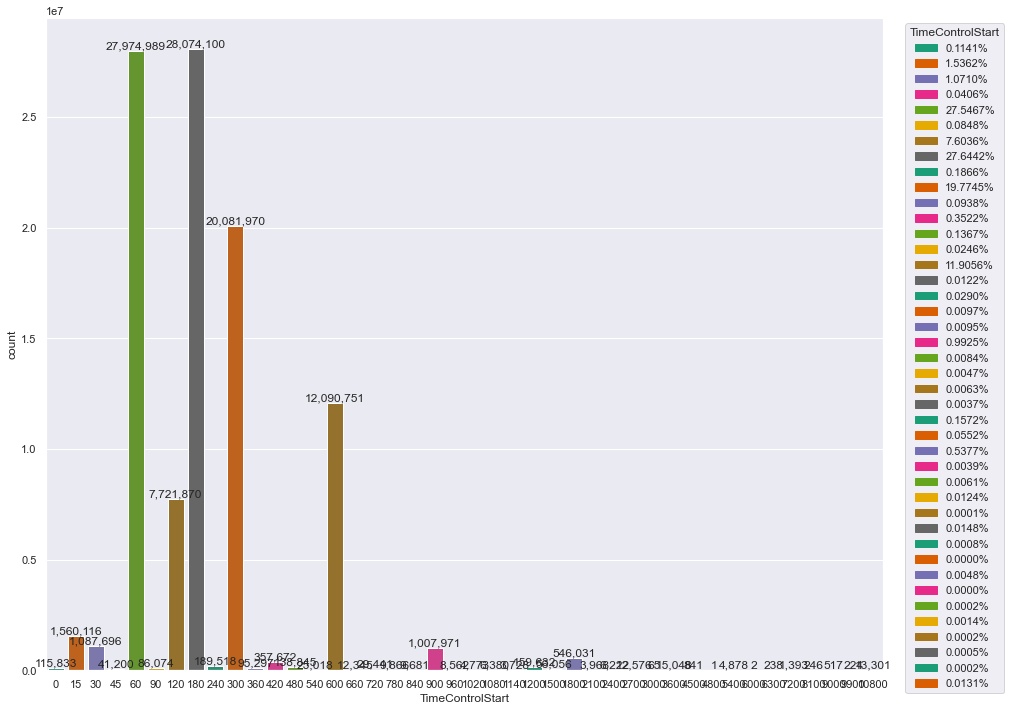

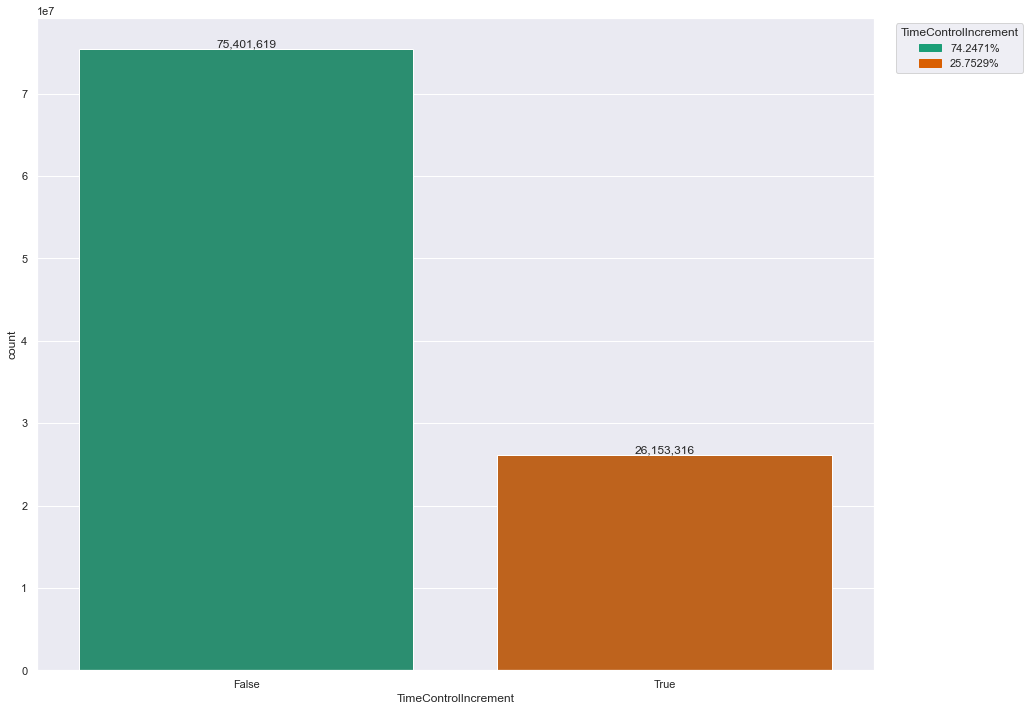

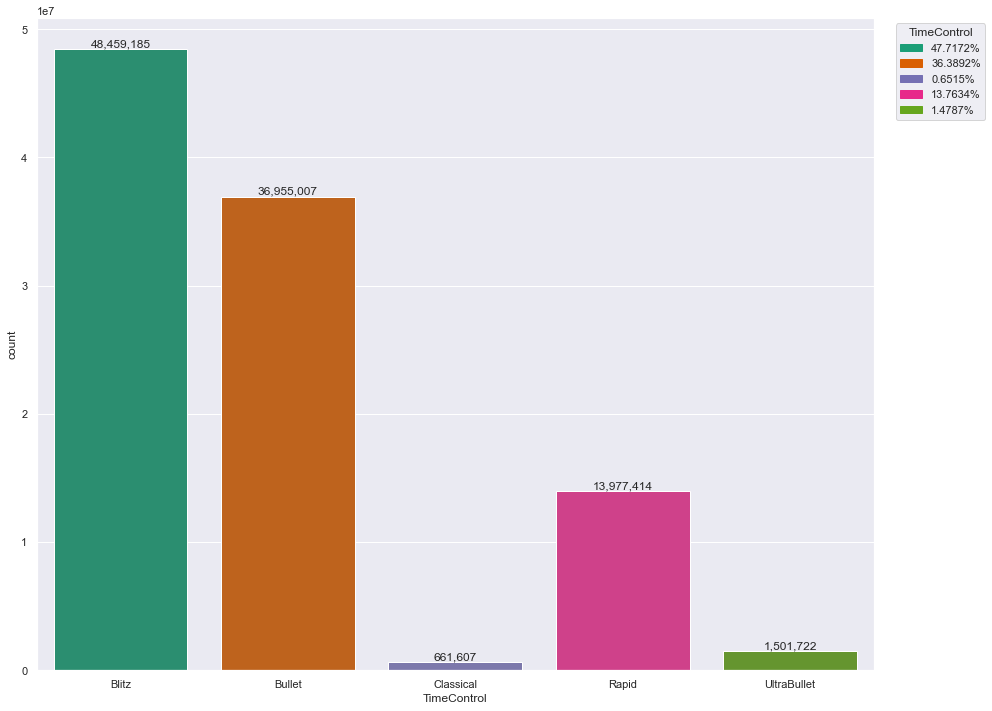

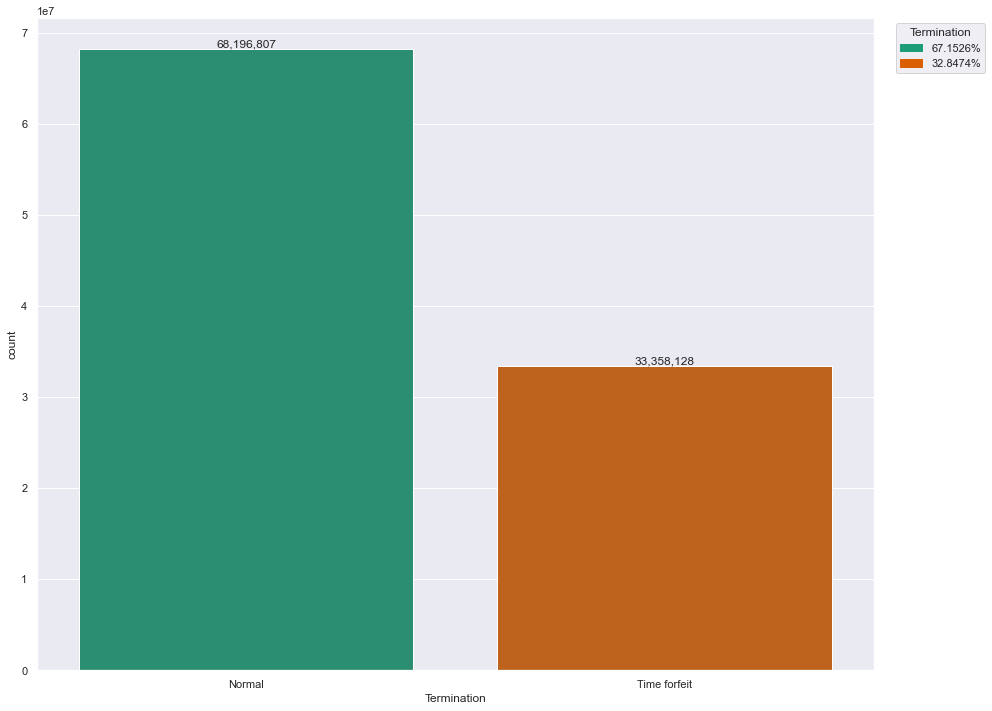

In [134]:
def convert_to_percentage(x,x_sum):
    perc = (x * 100)/x_sum
    return '{:.4f}%'.format(perc)
    
for column_name in loaded_dict.keys():
    #Get only ungrouped & few categorical data
    if type(column_name) is not tuple and column_name not in ['ECO','EloDifference']:
        #Reframe the index to a column
        df_data = loaded_dict[column_name].to_frame().reset_index()

        #Rename the columns
        df_data = df_data.rename(columns = {'index':column_name,column_name:'count'})
        #Add percentage column to add to plot legend
        x_sum = df_data['count'].sum()
        df_data['Percentages'] = df_data['count'].apply(lambda x: convert_to_percentage(x,x_sum))
        
        #Plot data as a barplot
        #Set color palette number to number of rows in dataset
        sns.set_palette(palette='Dark2',n_colors = df_data.shape[0])
        #Plot data
        ax = sns.barplot(data=df_data,x=column_name, y='count')
        #Adjust size of plot
        sns.set(rc={'figure.figsize':(15,12)})
        #Set the count values on each bar
        container = ax.containers[0]
        #Show values on bar
        ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
        #Show percentages on legend
        #Set handles for legend ##Change x in enumerate(x) of line for new labels 
        patches = [mplp.Patch(color=sns.color_palette(palette='Dark2',n_colors=df_data.shape[0])[i], label=t) for i,t in enumerate(df_data['Percentages'].to_list())]
        #Set legend
        plt.legend(patches, df_data['Percentages'], title = column_name, bbox_to_anchor=(1.02, 1), loc='upper left')
        #Show plot
        plt.show()

In [141]:
column_name = 'ECO'
#Reframe the index to a column
df_data = loaded_dict[column_name].to_frame().reset_index()

#Rename the columns
df_data = df_data.rename(columns = {'index':column_name,column_name:'count'})
#Add percentage column to add to plot legend
x_sum = df_data['count'].sum()
df_data['Percentages'] = df_data['count'].apply(lambda x: convert_to_percentage(x,x_sum))
df_data = df_data.sort_values('count',ascending = False)
df_data.head(25)

,ECO,count,Percentages
0,A00,6634003.0,6.5324%
40,A40,5486721.0,5.4027%
101,B01,5170803.0,5.0916%
100,B00,4414770.0,4.3472%
300,D00,4326671.0,4.2604%
200,C00,4076832.0,4.0144%
250,C50,2910973.0,2.8664%
220,C20,2656663.0,2.6160%
110,B10,2464434.0,2.4267%
241,C41,2298987.0,2.2638%


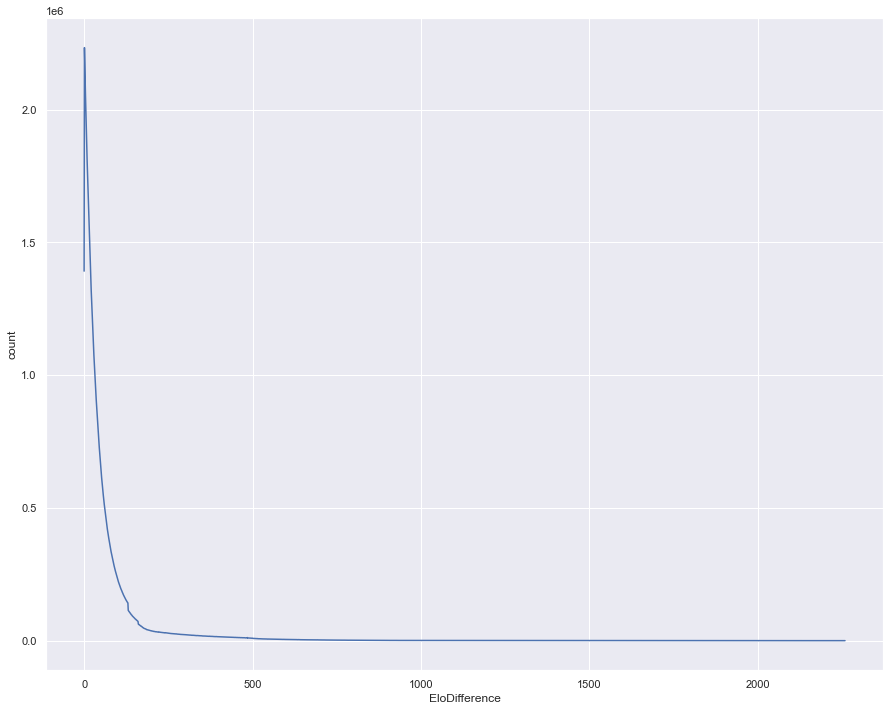

    EloDifference      count Percentages
0               0  1391983.0     1.3707%
1               1  2233941.0     2.1997%
2               2  2170793.0     2.1376%
3               3  2111260.0     2.0789%
4               4  2056760.0     2.0253%
5               5  2003858.0     1.9732%
6               6  1949646.0     1.9198%
7               7  1901607.0     1.8725%
8               8  1854057.0     1.8257%
9               9  1805397.0     1.7778%
10             10  1764556.0     1.7375%
11             11  1723966.0     1.6976%
12             12  1681093.0     1.6554%
13             13  1629269.0     1.6043%
14             14  1590455.0     1.5661%
15             15  1547466.0     1.5238%
16             16  1506919.0     1.4838%
17             17  1469377.0     1.4469%
18             18  1432504.0     1.4106%
19             19  1395240.0     1.3739%
20             20  1362730.0     1.3419%
21             21  1320519.0     1.3003%
22             22  1289515.0     1.2698%
23             2

In [180]:
column_name = 'EloDifference'
#Reframe the index to a column
df_data = loaded_dict[column_name].to_frame().reset_index()

#Rename the columns
df_data = df_data.rename(columns = {'index':column_name,column_name:'count'})
#Add percentage column to add to plot legend
x_sum = df_data['count'].sum()
df_data['Percentages'] = df_data['count'].apply(lambda x: convert_to_percentage(x,x_sum))
df_data = df_data.sort_values('EloDifference',ascending = True)

#Plot data
#ax = sns.histplot(data=df_data,x=column_name,y='count',bins = 150)
#plt.xticks(np.arange(0 ,df_data[column_name].max(),100).tolist())
ax = sns.lineplot(data=df_data,x=column_name,y='count')
plt.show()

print(df_data.head(25))

('TimeControl', 'Result')


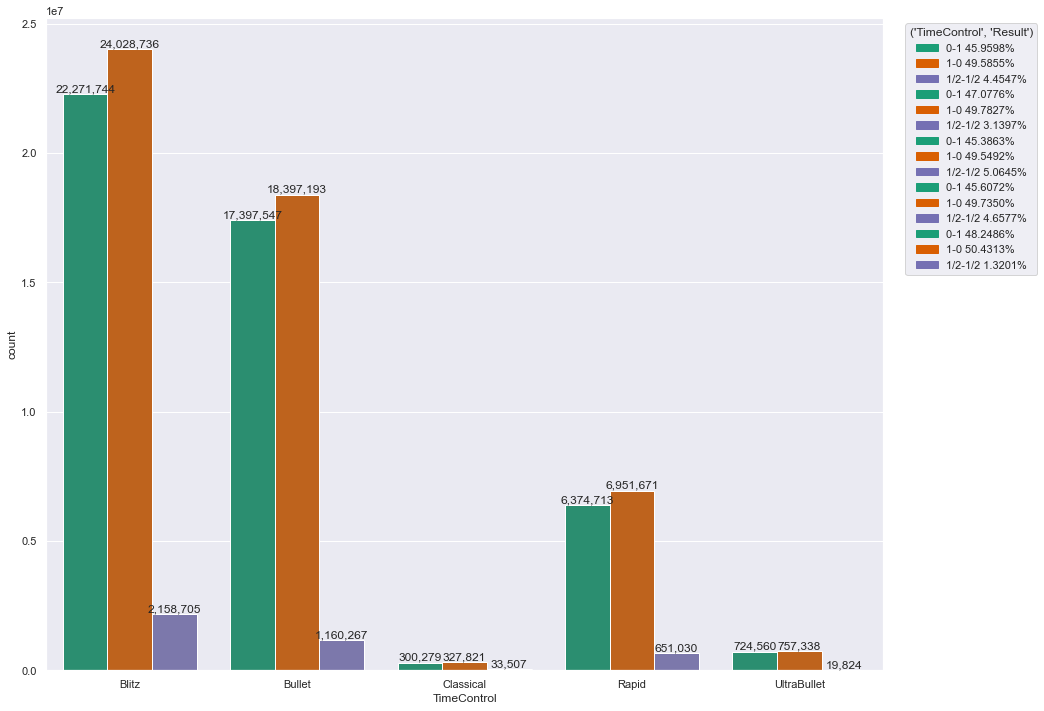

('TimeControl', 'TimeControlStart')


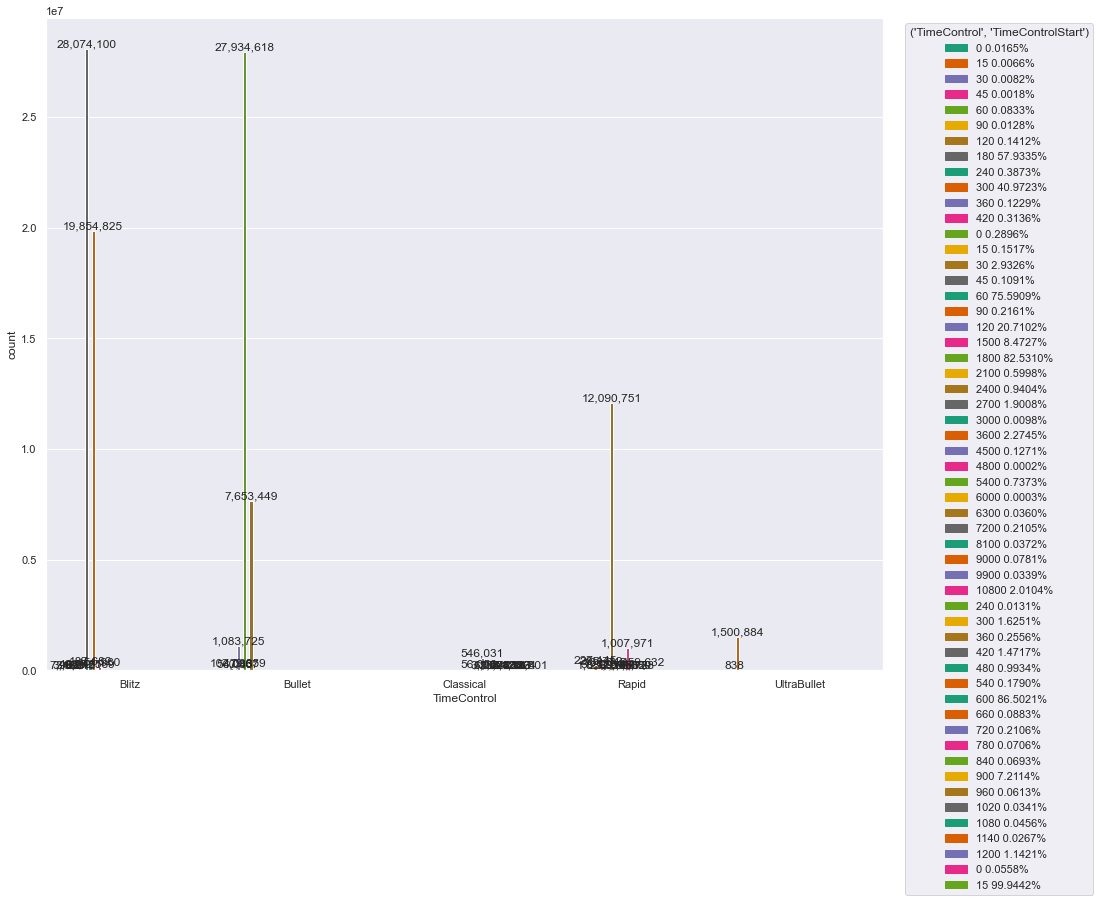

('TimeControl', 'TimeControlIncrement')


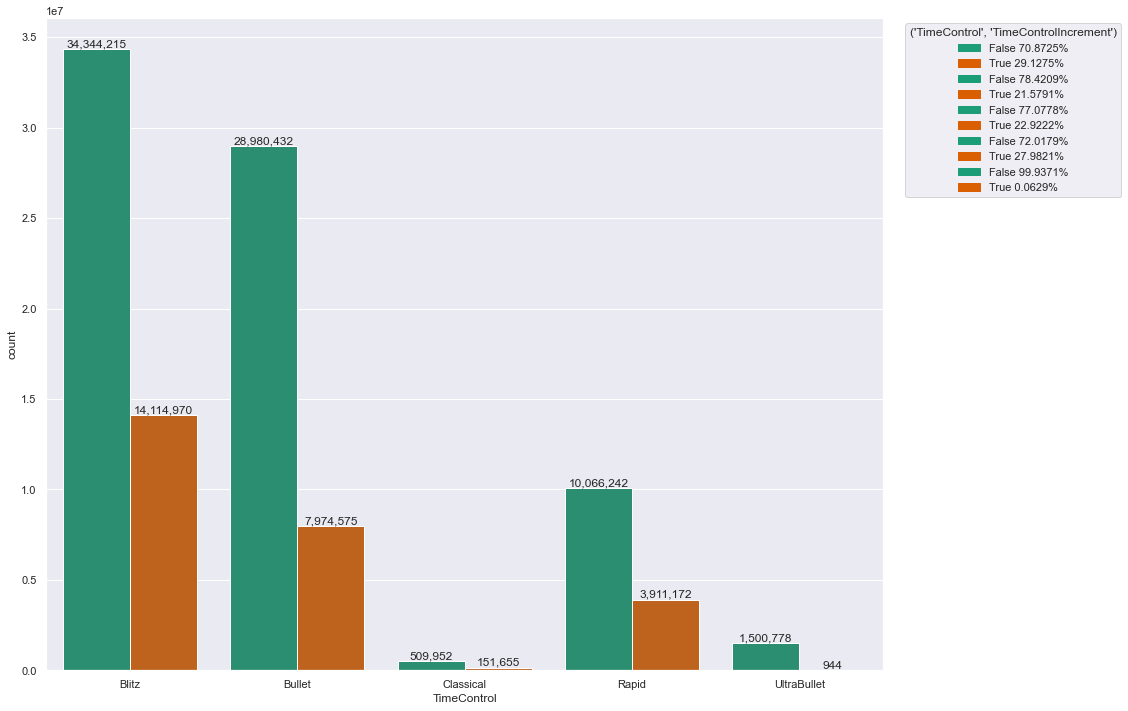

('TimeControl', 'Termination')


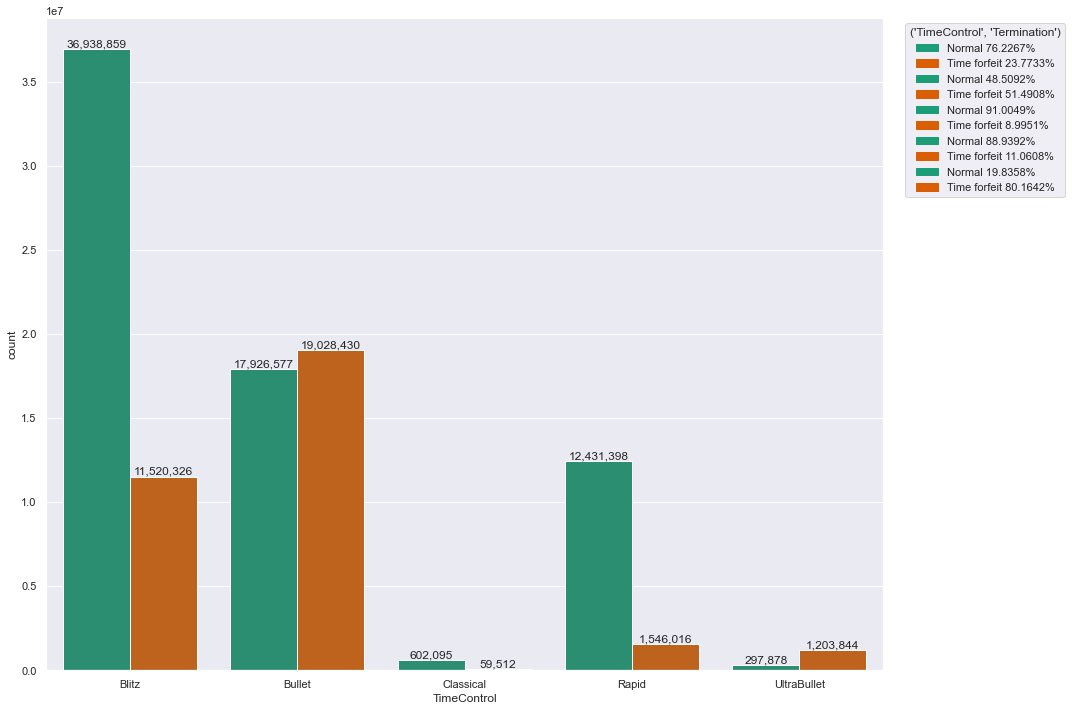

In [239]:
def convert_to_percentage(x,x_tc,tc_dict):
    perc = (x * 100)/tc_dict[x_tc]
    return '{:.4f}%'.format(perc)

for column_name in loaded_dict.keys():
    #Get grouped data
    if type(column_name) is tuple and column_name not in [('TimeControl','TimeControl'),
                                                          ('TimeControl','ECO'),
                                                         ('TimeControl','EloDifference')]:
        #Reframe the index to a column
        df_data = loaded_dict[column_name].to_frame().reset_index()

        #Rename the columns
        df_data = df_data.rename(columns = {0:'count'})
        #Drop 0 values from count
        df_data= df_data[df_data['count'] != 0]
        dict_tc_count = loaded_dict['TimeControl'].to_dict()
        #Add percentage of grouped data
        df_data['Percentages'] = df_data.apply(lambda row: convert_to_percentage(row['count'],row['TimeControl'],dict_tc_count),axis=1)
                
        print(column_name)
        column_subname = column_name[1]

        #Plot data as a barplot
        #Set color palette number to number of rows in dataset
        sns.set_palette(palette='Dark2',n_colors = df_data.shape[0])
        #Plot data
        ax = sns.barplot(data=df_data,x='TimeControl', y='count',hue = column_subname)
        #Adjust size of plot
        sns.set(rc={'figure.figsize':(15,12)})
        #Set the count values on each bar
        for container in ax.containers:
            #Show values on bar
            ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
        #Show percentages on legend
        bar_labels = (df_data[column_subname].astype(str) + ' ' + df_data['Percentages']).to_list()
        #Set handles for legend ##Change x in enumerate(x) of line for new labels 
        patches = [mplp.Patch(color=sns.color_palette(palette='Dark2',n_colors=df_data.shape[0])[i%len(ax.containers)], label=t) for i,t in enumerate(bar_labels)]
        #Set legend
        plt.legend(patches, bar_labels, title = column_name, bbox_to_anchor=(1.02, 1), loc='upper left')
        #Show plot
        plt.show()